## Initialize

In [35]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In the following, we can input the parameters as the tutorial.

In [90]:
resolution = 30   # pixels/um

eps = 13          # dielectric constant of waveguide
w = 1.2           # width of waveguide
r = 0.36          # radius of large holes
#rs = 0.2         # radius of small holes
rs = 0.1          # smaller holes


sy = 6      # size of cell in y direction (perpendicular to wvg.)
pad = 2           # padding between last hole and PML edge
dpml = 1          # PML thickness

fcen = 0.25   # pulse center frequency
df = 0.2  

pml_layers = [mp.PML(1.0)]

Next, we do the initial run for the transmission without any hole

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00192595 s
Working in 2D dimensions.
Computational cell is 18 x 6 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
time for set_epsilon = 0.22104 s
-----------
creating output file "./eps-000000.00.h5"...
field decay(t = 50.016666666666666): 1.1685457516206308e-07 / 1.1685457516206308e-07 = 1.0
field decay(t = 100.01666666666667): 0.01757841933775781 / 0.01757841933775781 = 1.0
field decay(t = 150.03333333333333): 5.471832481792123e-06 / 0.01757841933775781 = 0.0003112812578113223
run 0 finished at t = 150.03333333333333 (9002 timesteps)
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)


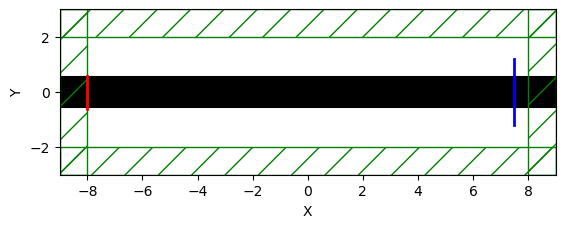

In [91]:
N = 3
sx = 2*(pad+dpml+2*N)
cell = mp.Vector3(sx,sy,0)
geometry = [mp.Block(size=mp.Vector3(mp.inf,w,mp.inf), material=mp.Medium(epsilon=eps))]
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=mp.Ey,
                 center=mp.Vector3(-0.5*sx+dpml),
                 size=mp.Vector3(0,w))]
sym = [mp.Mirror(mp.Y, phase=-1)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    symmetries=sym,
                    resolution=resolution)
freg = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-0.5),
                         size=mp.Vector3(0,2*w))
nfreq = 500 # number of frequencies at which to compute flux

# transmitted flux
trans = sim.add_flux(fcen, df, nfreq, freg)

sim.run(mp.at_beginning(mp.output_epsilon),
        until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(0.5*sx-dpml-0.5), 1e-3))
nohole_flux = mp.get_fluxes(trans)
sim.plot2D()
plt.show()

## Transmission

In [92]:
show_T = True  # a switch to determine if we will show transmission graph in the following
T_graph_file = 'wvg_ssh_n3_m.png' # the name of the file to save transmission graph
record_animate = False  # a switch to determine if we will record the animation during the process

In [93]:
blk = mp.Block(size=mp.Vector3(mp.inf,w,mp.inf), material=mp.Medium(epsilon=eps))
geometry = [blk]

for i in range(N):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(2*i+3/2)))
        geometry.append(mp.Cylinder(rs, center=mp.Vector3(2*i+1/2)))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(-(2*i+3/2))))
        geometry.append(mp.Cylinder(rs, center=mp.Vector3(-(2*i+1/2))))

In [94]:
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=mp.Ey,
                 center=mp.Vector3(-0.5*sx+dpml),
                 size=mp.Vector3(0,w))]
sym = [mp.Mirror(mp.Y, phase=-1)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    symmetries=sym,
                    resolution=resolution)

In [95]:
freg = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-0.5),
                         size=mp.Vector3(0,2*w))
nfreq = 500 # number of frequencies at which to compute flux

# transmitted flux
trans = sim.add_flux(fcen, df, nfreq, freg)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.002002 s
Working in 2D dimensions.
Computational cell is 18 x 6 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (1.5,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0.5,0,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.5,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.5,0,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (3.5,0,0)
          radius 0.36, heig

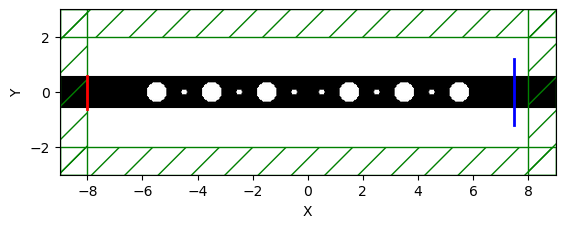

In [96]:
sim.run(mp.at_beginning(mp.output_epsilon),
        until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(0.5*sx-dpml-0.5), 1e-3))
sim.plot2D()
plt.show()

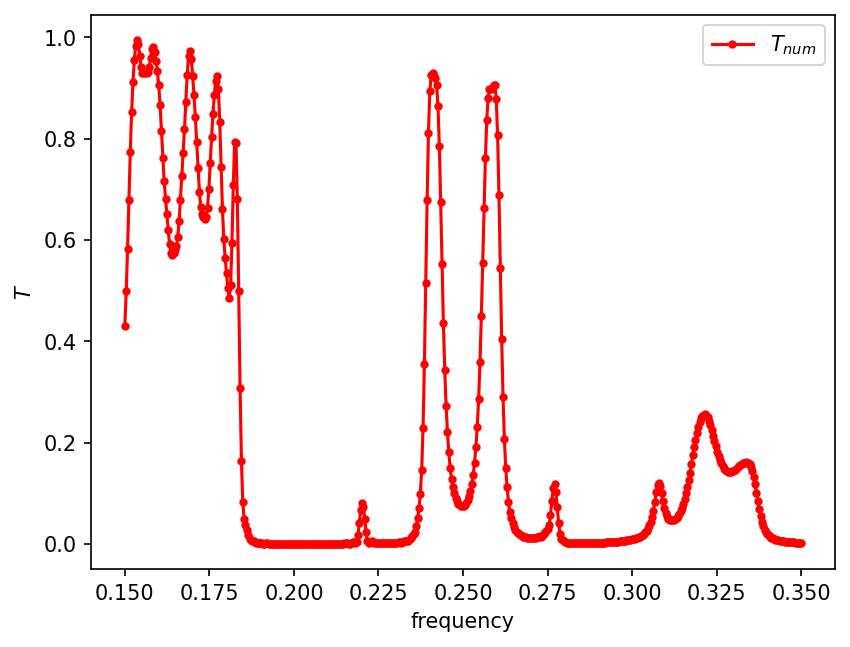

In [97]:
tran_flux = mp.get_fluxes(trans)
if show_T == True:
    wl = []
    Ts = []
    flux_freqs = mp.get_flux_freqs(trans)
    for i in range(nfreq):
        wl = np.append(wl, flux_freqs[i])
        Ts = np.append(Ts,tran_flux[i]/nohole_flux[i])   
    plt.figure(dpi=150)
    plt.plot(wl,Ts,'r.-',label='$T_{num}$')
    plt.xlabel(r'frequency')
    plt.ylabel('$T$')
    plt.legend(loc="upper right")
    plt.savefig(T_graph_file)
    plt.show()
if record_animate == True:
    sim.reset_meep()
    animate = mp.Animate2D(sim,
                       fields=mp.Hz, realtime=False, normalize=True,
                       field_parameters={'alpha':0.8, 'cmap':'seismic','interpolation':'none'})
    plt.close()
    sim.run(mp.at_beginning(mp.output_epsilon), mp.at_every(0.5,animate), until=100)
    animate.to_gif(10, 'wvg_cavity.gif')

### oOoOoO Arrange

N=3, rs=0.2

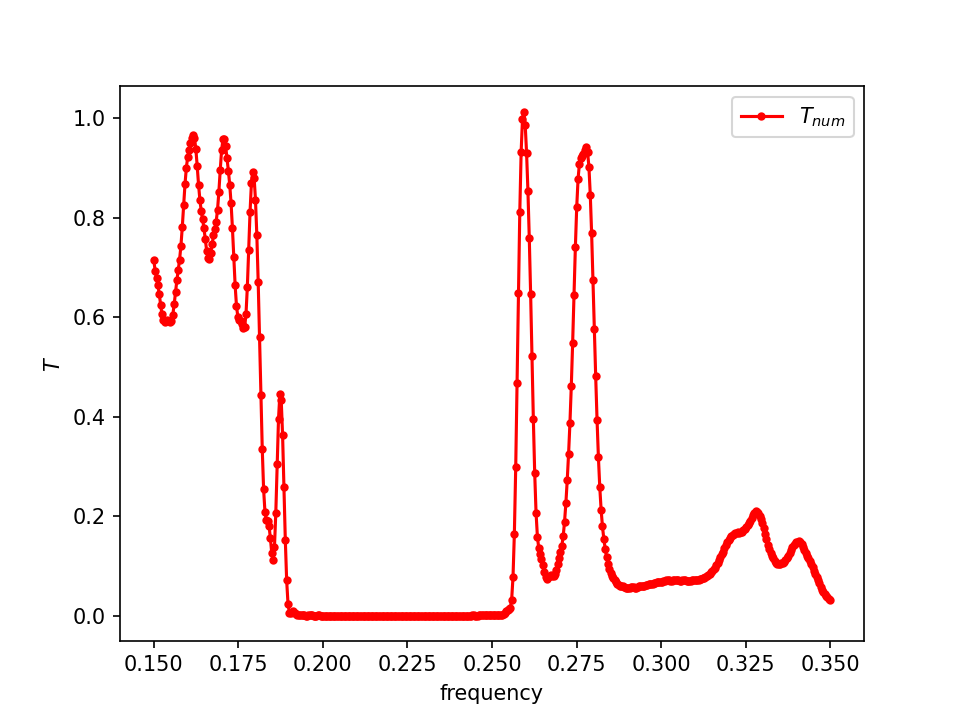

In [60]:
Image("wvg_ssh_n3r.png")

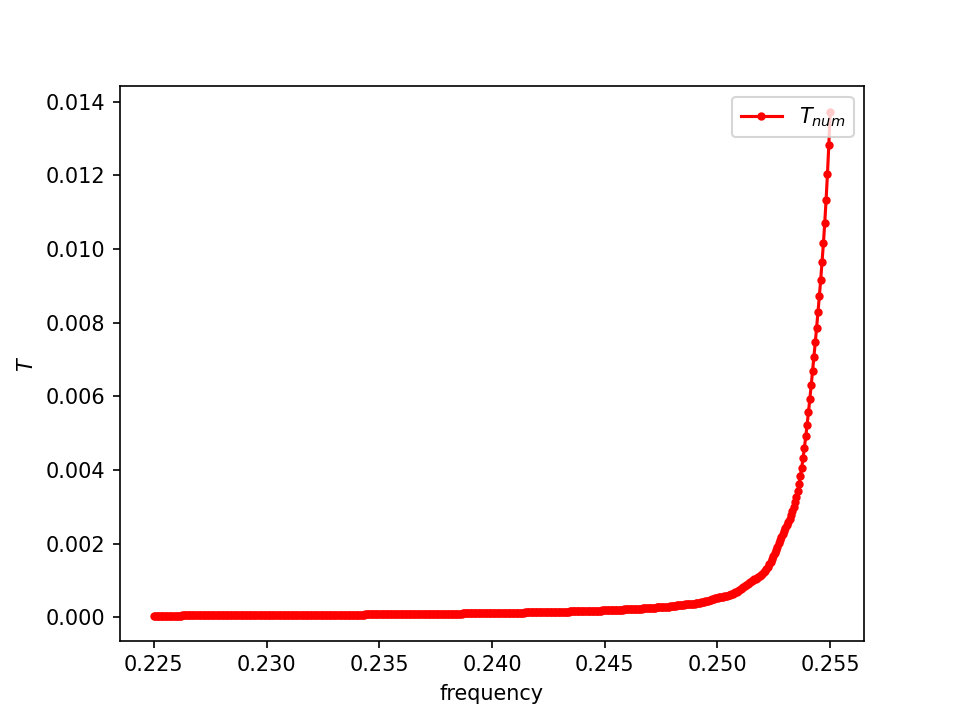

In [99]:
Image("wvg_ssh_n3r_f.png")

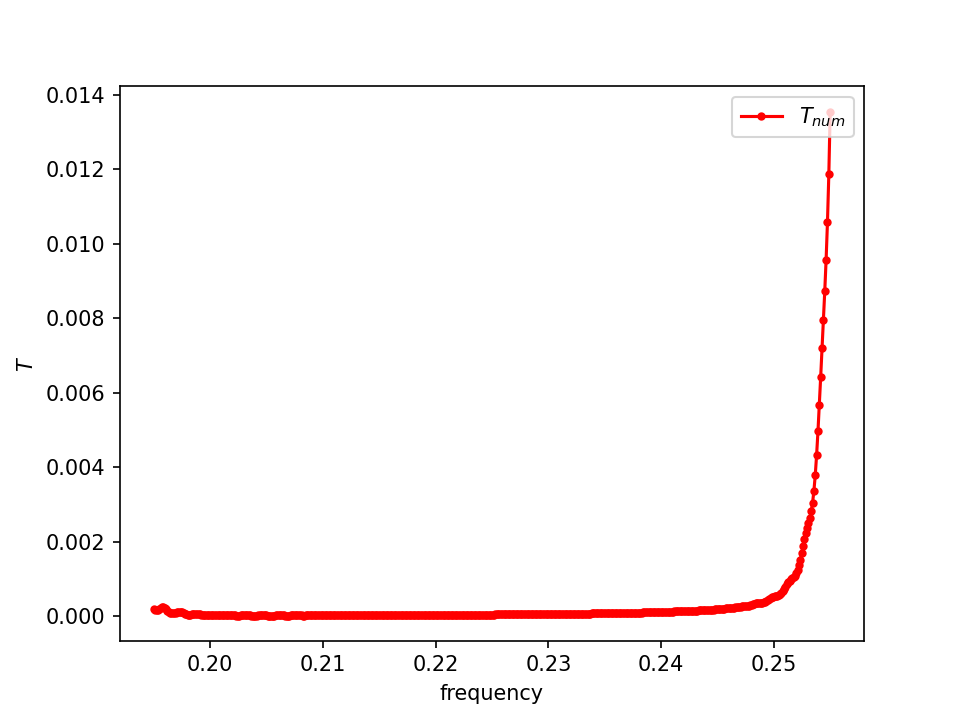

In [100]:
Image("wvg_ssh_n3r_f2.png")

N=3, rs=0.1

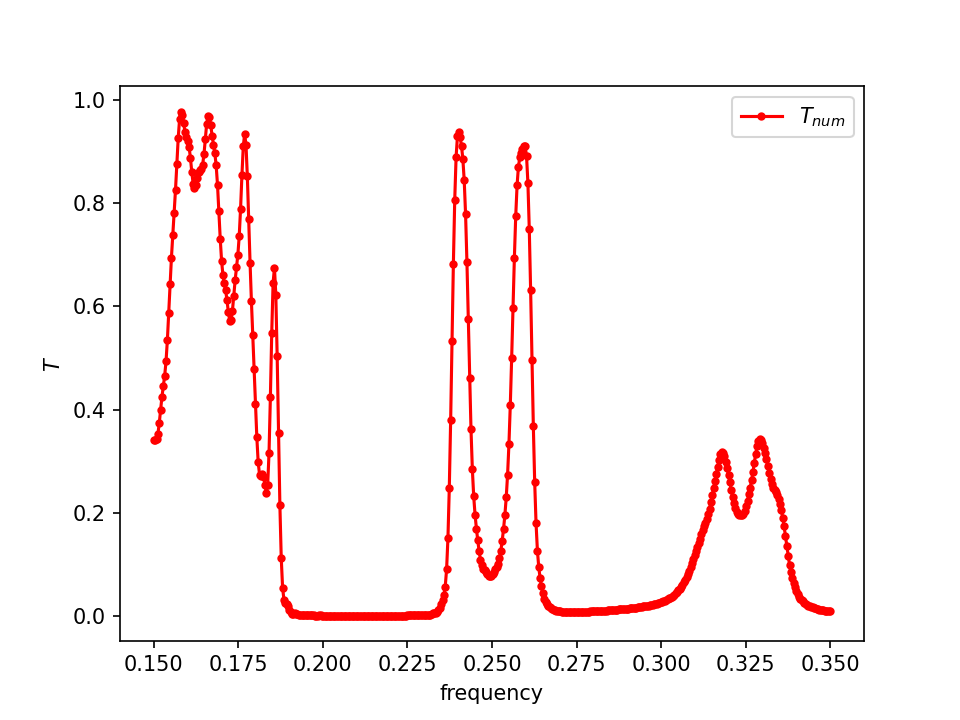

In [101]:
Image("wvg_ssh_n3r_m.png")

### OoOoOo Arrange

N=3, rs=0.2

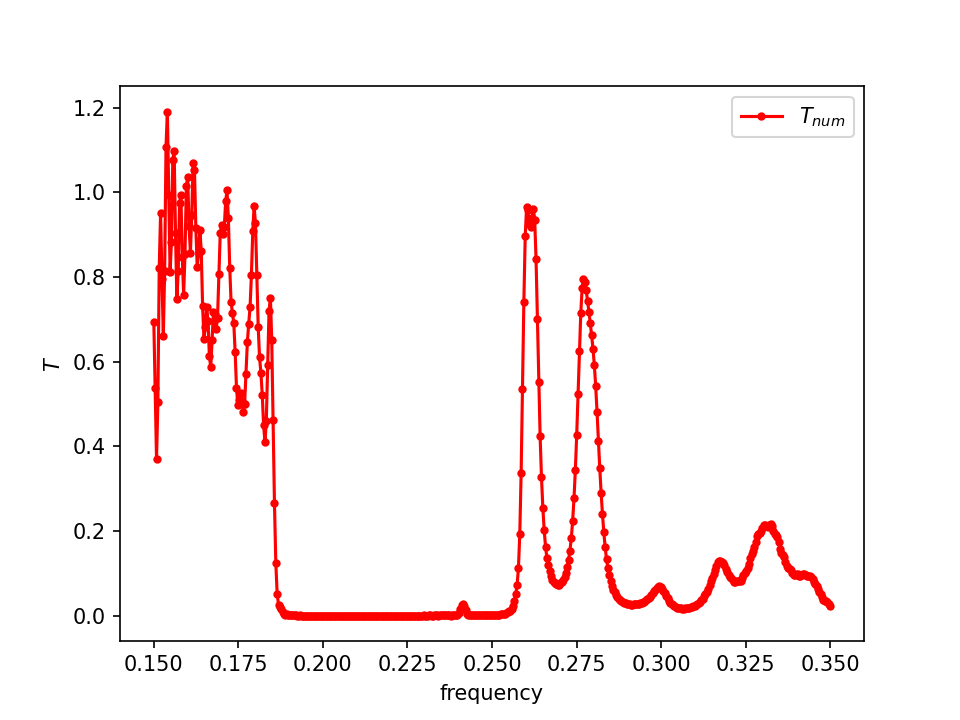

In [34]:
Image("wvg_ssh_n3.png")

N=3, rs=0.2, focus on peak

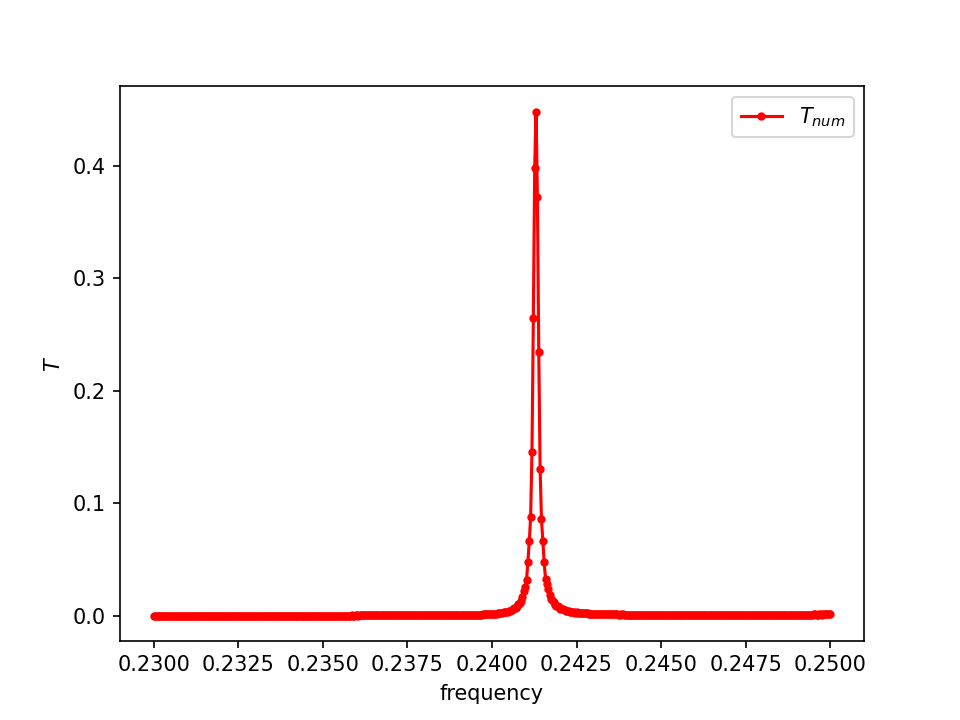

In [52]:
Image("wvg_ssh_n3_f.png")

N=3, rs=0.1

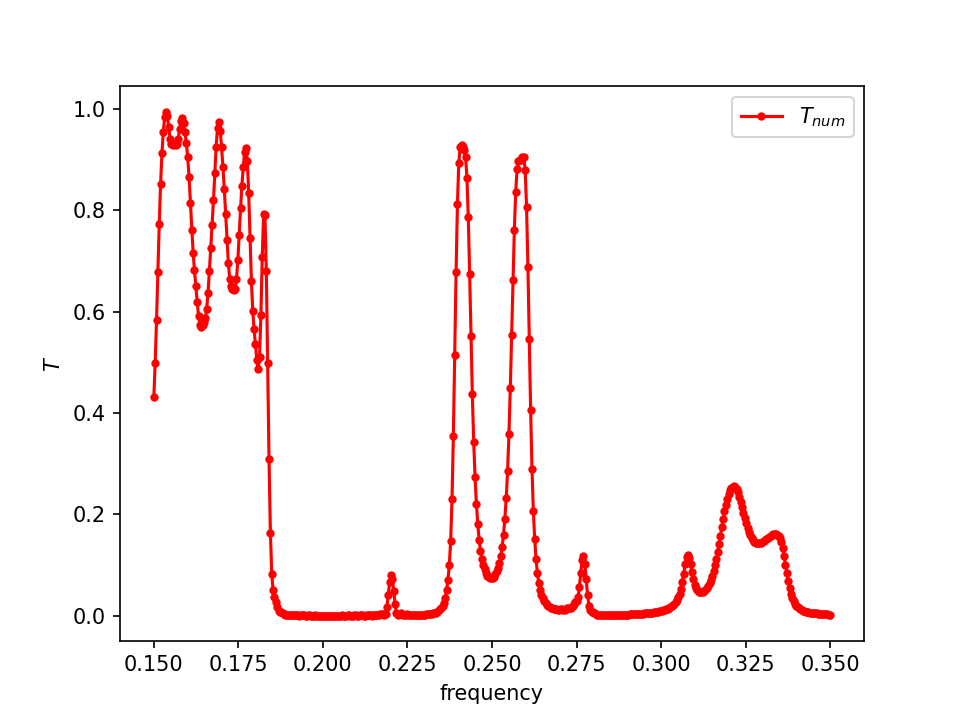

In [98]:
Image("wvg_ssh_n3_m.png")